# Option Class: Implementing Custom Derivatives

In this notebook I will demonstrate the functionality of the `Option` class defined in `methods.option`. I will show how call and put options are implemented, how to set american-style or european-style payoffs, and how to define custom derivatives by specifying their payoff function.

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

import numpy as np
import matplotlib.pyplot as plt

from methods.option import Option, Put, Call
from methods.node import Node


## Option Class

Let's start by defining an American Call and a European Put.

In [2]:
# Strike price
X_call = 100
X_put = 130

call_option = Call(X_call, american=True)
put_option = Put(X_put, american=False)

An Option has attributes called `payoff`, which is the option's payoff function, and `payoff_vars`, a list of variables needed to compute the payoff. This attribute is needed for when the option is inside a `Node` object and the payoff function is computed using the Node's attributes.

Possible `payoff_vars`values are lists with elements in `['time', 'S', 'sigma', 'r']`: time, underlying price/value, underlying volatility and risk-free interest rate respectively. These can be extended by modifying the `Node` class' attributes in `methods.node`. 
At time not yet equal to maturity, the attribute `american`is used by the objects implementing numerical methods to decide whether to take into account the option's intrinsic value at the Node when pricing. Node objects are important as they are used in the BinomialTree and ImplicitFiniteDifference classes.

In [3]:
print(f'A Put has payoff_vars = {put_option.payoff_vars}')

A Put has payoff_vars = ['S']


We can either directly evaluate the option or first assign it to a Node.

In [4]:
S = 100

print(f'Put option payoff is {put_option.payoff(S)}')

Put option payoff is 30


In [5]:
node = Node(time = 0, S=S, option=put_option)
print(f'Node payoff is {node.evaluate()}')

Node payoff is 30


In [6]:
# the value is also stored in the .intrinsic attribute
print(f'Node intrinsic value is {node.intrinsic}')

Node intrinsic value is 30


For the American Call:

In [7]:
print(f'Call option payoff is {call_option.payoff(S)}')

Call option payoff is 0


## Custom Derivatives

We can also define a custom payoff function for the considered derivative.

In [8]:
# For example payoff could be equal to the forward price of the underlying with 
# maturity T, with possible early exercise (american).
# For this example let's keep payoff_vars in ['time', 'S', 'sigma', 'r']

def custom_payoff(time, S, r):
    T = 5
    return S * np.e**(r*(T - time))

custom_derivative = Option(american=True, payoff_vars=['time', 'S', 'r'])
custom_derivative.payoff = custom_payoff

In [9]:
# Let's give some example values for each of the variables
time = 1
S = 100
r = 0.05

print(f'Custom payoff is: {custom_derivative.payoff(time, S, r): .2f}')

Custom payoff is:  122.14


We can also do this within a node:

In [10]:
custom_node = Node(time=time, S=S, r=r, option=custom_derivative)
print(f'Node payoff is: {custom_node.evaluate(): .2f}')


Node payoff is:  122.14


## Visualisation

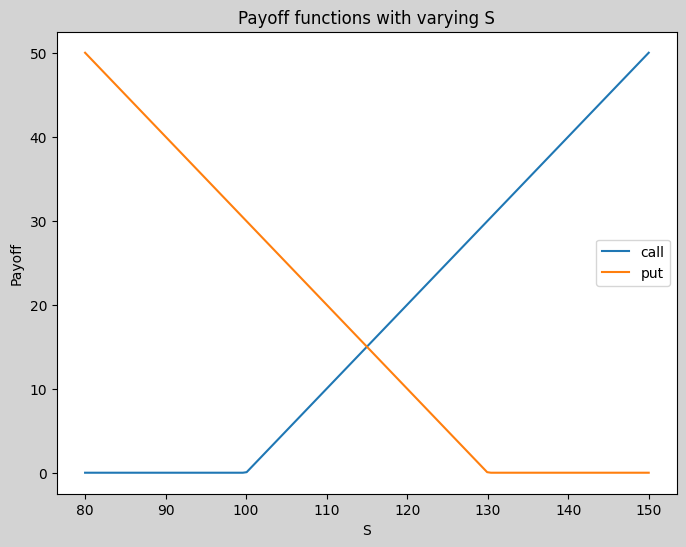

In [11]:
S_values = np.linspace(80, 150, 151)

plt.figure(figsize=(8,6), facecolor='lightgray')
plt.plot(S_values, [call_option.payoff(S_val) for S_val in S_values], label='call')
plt.plot(S_values, [put_option.payoff(S_val) for S_val in S_values], label='put')
#plt.plot(S_values, [custom_derivative.payoff(time, S_val, r) for S_val in S_values], label='custom')
plt.xlabel('S')
plt.ylabel('Payoff')
plt.title('Payoff functions with varying S')
plt.legend()
plt.show()

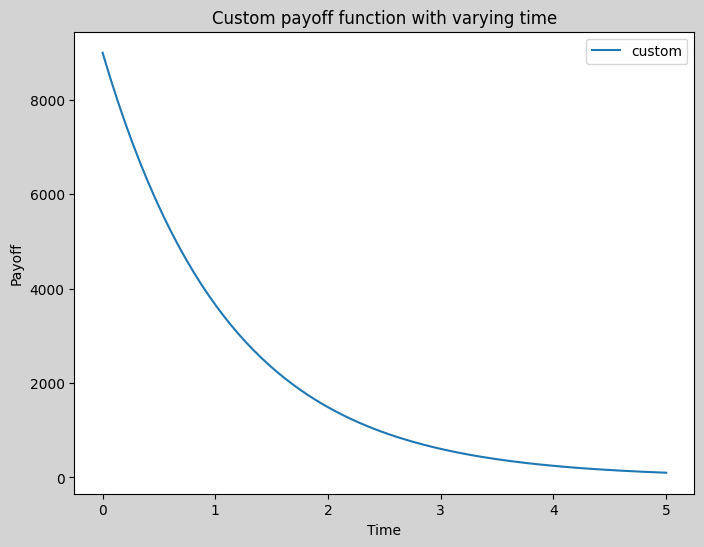

In [12]:
T = 5
time_values = np.linspace(0, T, 150)

# Let's make r very large so that the curve is accentuated
r = 0.9

plt.figure(figsize=(8,6), facecolor='lightgray')
plt.plot(time_values, [custom_derivative.payoff(t, S, r) for t in time_values], label='custom')
plt.title('Custom payoff function with varying time')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Payoff')
plt.show()